In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

# Tracking U.S. Global Alignment in the United Nations General Assembly

## Data

In [ ]:
agreements = pd.read_csv('/content/AgreementScoresAll_Jun2024.csv')
agreements

,Unnamed: 0,session.x,ccode1,ccode2,agree,year,IdealPointAll.x,NVotesAll.x,IdealPointAll.y,NVotesAll.y,IdealPointDistance
0,1,1,2,20,0.853659,1946,1.676350,42.0,1.802806,41.0,0.126456
1,2,1,2,40,0.712500,1946,1.676350,42.0,1.440118,40.0,0.236232
2,3,1,2,41,0.568182,1946,1.676350,42.0,0.910606,22.0,0.765744
3,4,1,2,42,0.731707,1946,1.676350,42.0,1.610723,41.0,0.065627
4,5,1,2,70,0.565789,1946,1.676350,42.0,1.133682,38.0,0.542668
...,...,...,...,...,...,...,...,...,...,...,...
1800289,1800290,78,990,955,0.794118,2023,0.061915,22.0,0.074017,63.0,0.012102
1800290,1800291,78,990,970,0.708333,2023,0.061915,22.0,0.373895,48.0,0.311980
1800291,1800292,78,990,983,0.675000,2023,0.061915,22.0,0.950843,64.0,0.888928
1800292,1800293,78,990,986,0.809524,2023,0.061915,22.0,0.602028,82.0,0.540114


In [ ]:
idealpoints = pd.read_csv('/content/IdealpointestimatesAll_Jun2024.csv')
idealpoints

,Unnamed: 0,ccode,session,NVotesAll,IdealPointAll,QO%All,Q5%All,Q10%All,Q50%All,Q90%All,Q95%All,Q100%All,iso3c,Countryname,USAgree,RUSSAgree,BrazilAgree,ChinaAgree,IndiaAgree,IsraelAgree
0,1,2,1,42,1.676350,1.099770,1.339545,1.404822,1.668589,1.958060,2.039101,2.490737,USA,United States,1.000000,0.214286,0.642857,NaN,0.476191,NaN
1,2,2,2,38,1.975167,1.290319,1.559735,1.650037,1.951857,2.325626,2.488103,2.900903,USA,United States,1.000000,0.263158,0.842105,NaN,0.297297,NaN
2,3,2,3,103,1.886102,1.372502,1.536494,1.602467,1.875287,2.168638,2.266258,2.562289,USA,United States,1.000000,0.127451,0.776699,NaN,0.370000,0.166667
3,4,2,4,63,1.753212,1.279482,1.497219,1.549291,1.745286,1.945309,2.007389,2.251220,USA,United States,1.000000,0.111111,0.539682,NaN,0.365079,0.516129
4,5,2,5,53,1.620488,0.843403,1.253614,1.333876,1.613809,1.926375,1.991641,2.423023,USA,United States,1.000000,0.173077,0.811321,NaN,0.509434,0.604167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,11234,990,74,87,0.008899,-0.311485,-0.153289,-0.113841,0.012850,0.121627,0.152402,0.272194,WSM,Samoa,0.172414,0.630952,0.712644,0.732558,0.724138,0.200000
11234,11235,990,75,91,0.031334,-0.237651,-0.130044,-0.091074,0.032037,0.152677,0.187605,0.323545,WSM,Samoa,0.208791,0.615385,0.747253,0.696629,0.692308,0.222222
11235,11236,990,76,56,-0.036174,-0.383724,-0.198855,-0.168088,-0.028986,0.087188,0.123457,0.222618,WSM,Samoa,0.232143,0.553571,0.696429,0.750000,0.678571,0.185185
11236,11237,990,77,65,0.047324,-0.304110,-0.135558,-0.093562,0.047339,0.187594,0.218628,0.331955,WSM,Samoa,0.369231,0.523077,0.800000,0.676923,0.630769,0.290323


In [ ]:
agreements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800294 entries, 0 to 1800293
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   session.x           int64  
 2   ccode1              int64  
 3   ccode2              int64  
 4   agree               float64
 5   year                int64  
 6   IdealPointAll.x     float64
 7   NVotesAll.x         float64
 8   IdealPointAll.y     float64
 9   NVotesAll.y         float64
 10  IdealPointDistance  float64
dtypes: float64(6), int64(5)
memory usage: 151.1 MB


In [ ]:
idealpoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11238 entries, 0 to 11237
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11238 non-null  int64  
 1   ccode          11238 non-null  int64  
 2   session        11238 non-null  int64  
 3   NVotesAll      11238 non-null  int64  
 4   IdealPointAll  11238 non-null  float64
 5   QO%All         11238 non-null  float64
 6   Q5%All         11238 non-null  float64
 7   Q10%All        11238 non-null  float64
 8   Q50%All        11238 non-null  float64
 9   Q90%All        11238 non-null  float64
 10  Q95%All        11238 non-null  float64
 11  Q100%All       11238 non-null  float64
 12  iso3c          11238 non-null  object 
 13  Countryname    11238 non-null  object 
 14  USAgree        11237 non-null  float64
 15  RUSSAgree      11233 non-null  float64
 16  BrazilAgree    11237 non-null  float64
 17  ChinaAgree     9149 non-null   float64
 18  IndiaA

In [ ]:
agreements.describe()

,Unnamed: 0,session.x,ccode1,ccode2,agree,year,IdealPointAll.x,NVotesAll.x,IdealPointAll.y,NVotesAll.y,IdealPointDistance
count,1.800294e+06,1.800294e+06,1.800294e+06,1.800294e+06,1.800294e+06,1.800294e+06,1.787628e+06,1.787628e+06,1.787628e+06,1.787628e+06,1.787394e+06
mean,9.001475e+05,5.081110e+01,4.550153e+02,4.550153e+02,8.133962e-01,1.995811e+03,-2.841541e-02,7.783832e+01,-2.841541e-02,7.783832e+01,1.025297e+00
std,5.197003e+05,1.854783e+01,2.591186e+02,2.591186e+02,1.567393e-01,1.854783e+01,9.411212e-01,2.954790e+01,9.411212e-01,2.954790e+01,8.417847e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.946000e+03,-3.146242e+00,1.000000e+00,-3.146242e+00,1.000000e+00,2.000000e-07
25%,4.500742e+05,3.700000e+01,2.300000e+02,2.300000e+02,7.180851e-01,1.982000e+03,-6.447224e-01,6.400000e+01,-6.447224e-01,6.400000e+01,3.263248e-01
50%,9.001475e+05,5.400000e+01,4.390000e+02,4.390000e+02,8.529412e-01,1.999000e+03,-2.136239e-01,7.300000e+01,-2.136239e-01,7.300000e+01,8.293413e-01
75%,1.350221e+06,6.600000e+01,6.630000e+02,6.630000e+02,9.425287e-01,2.011000e+03,7.304395e-01,8.900000e+01,7.304395e-01,8.900000e+01,1.552402e+00
max,1.800294e+06,7.800000e+01,9.900000e+02,9.900000e+02,1.000000e+00,2.023000e+03,3.222513e+00,1.580000e+02,3.222513e+00,1.580000e+02,5.933357e+00


In [ ]:
idealpoints.describe()

,Unnamed: 0,ccode,session,NVotesAll,IdealPointAll,QO%All,Q5%All,Q10%All,Q50%All,Q90%All,Q95%All,Q100%All,USAgree,RUSSAgree,BrazilAgree,ChinaAgree,IndiaAgree,IsraelAgree
count,11238.000000,11238.000000,11238.000000,11238.000000,1.123800e+04,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11237.000000,11233.000000,11237.000000,9149.000000,11237.000000,11126.000000
mean,5619.500000,449.946254,46.487898,76.404431,-1.522593e-09,-0.556353,-0.274618,-0.212443,0.002831,0.208758,0.265038,0.504106,0.292536,0.612542,0.731068,0.736993,0.683858,0.341582
std,3244.275497,259.232206,20.494366,31.123575,9.844053e-01,1.124300,1.043739,1.028300,0.981452,0.949304,0.943099,0.932972,0.198864,0.193871,0.181596,0.180582,0.190472,0.187178
min,1.000000,2.000000,1.000000,1.000000,-3.146242e+00,-4.965373,-3.997744,-3.798240,-3.148018,-2.619469,-2.515225,-2.191464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2810.250000,221.000000,31.000000,61.000000,-6.334970e-01,-1.320829,-0.967157,-0.888570,-0.626935,-0.391697,-0.331850,-0.092407,0.144927,0.514286,0.612500,0.602740,0.528090,0.189189
50%,5619.500000,438.000000,49.000000,72.000000,-1.672289e-01,-0.655920,-0.405017,-0.347506,-0.163094,0.008949,0.058070,0.263820,0.233010,0.638889,0.784483,0.800000,0.746269,0.300000
75%,8428.750000,660.000000,64.000000,89.000000,7.803879e-01,0.389618,0.581162,0.626480,0.780198,0.934909,0.984107,1.183387,0.388060,0.722973,0.875000,0.871212,0.826667,0.459747
max,11238.000000,990.000000,78.000000,158.000000,3.222513e+00,2.830759,3.007136,3.042623,3.220568,3.555105,3.692826,4.275053,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [ ]:
# checking for null values
agreements.isnull().sum()

,0
Unnamed: 0,0
session.x,0
ccode1,0
ccode2,0
agree,0
year,0
IdealPointAll.x,12666
NVotesAll.x,12666
IdealPointAll.y,12666
NVotesAll.y,12666


In [ ]:
agreements[agreements.isnull().any(axis=1)]

,Unnamed: 0,session.x,ccode1,ccode2,agree,year,IdealPointAll.x,NVotesAll.x,IdealPointAll.y,NVotesAll.y,IdealPointDistance
93628,93629,18,2,511,0.5,1963,1.830495,31.0,NaN,NaN,NaN
93740,93741,18,20,511,0.5,1963,1.640113,31.0,NaN,NaN,NaN
93852,93853,18,40,511,0.5,1963,-2.712379,29.0,NaN,NaN,NaN
93964,93965,18,41,511,1.0,1963,0.465758,20.0,NaN,NaN,NaN
94076,94077,18,42,511,0.5,1963,1.015841,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
742230,742231,48,935,560,1.0,1993,-0.566302,3.0,NaN,NaN,NaN
742576,742577,48,950,560,1.0,1993,0.270182,58.0,NaN,NaN,NaN
742752,742753,48,983,560,1.0,1993,0.788245,62.0,NaN,NaN,NaN
742928,742929,48,987,560,1.0,1993,0.778198,62.0,NaN,NaN,NaN


In [ ]:
agreements = agreements.dropna()
agreements

,Unnamed: 0,session.x,ccode1,ccode2,agree,year,IdealPointAll.x,NVotesAll.x,IdealPointAll.y,NVotesAll.y,IdealPointDistance
0,1,1,2,20,0.853659,1946,1.676350,42.0,1.802806,41.0,0.126456
1,2,1,2,40,0.712500,1946,1.676350,42.0,1.440118,40.0,0.236232
2,3,1,2,41,0.568182,1946,1.676350,42.0,0.910606,22.0,0.765744
3,4,1,2,42,0.731707,1946,1.676350,42.0,1.610723,41.0,0.065627
4,5,1,2,70,0.565789,1946,1.676350,42.0,1.133682,38.0,0.542668
...,...,...,...,...,...,...,...,...,...,...,...
1800289,1800290,78,990,955,0.794118,2023,0.061915,22.0,0.074017,63.0,0.012102
1800290,1800291,78,990,970,0.708333,2023,0.061915,22.0,0.373895,48.0,0.311980
1800291,1800292,78,990,983,0.675000,2023,0.061915,22.0,0.950843,64.0,0.888928
1800292,1800293,78,990,986,0.809524,2023,0.061915,22.0,0.602028,82.0,0.540114


In [ ]:
# checking null values are now 0
agreements.isnull().sum()

,0
Unnamed: 0,0
session.x,0
ccode1,0
ccode2,0
agree,0
year,0
IdealPointAll.x,0
NVotesAll.x,0
IdealPointAll.y,0
NVotesAll.y,0


I decided to drop all null values from the `agreements` dataframe because many columns had null values, particularly `IdealPointAll.x`, `NVotesAll.x`, `IdealPointAll.y`, `NVotesAll.y`, `IdealPointDistance`. Dropping the null values will help ensure valid inputs for my analysis.


In [ ]:
idealpoints.isnull().sum()

,0
Unnamed: 0,0
ccode,0
session,0
NVotesAll,0
IdealPointAll,0
QO%All,0
Q5%All,0
Q10%All,0
Q50%All,0
Q90%All,0


In [ ]:
idealpoints[idealpoints.isnull().any(axis=1)]

,Unnamed: 0,ccode,session,NVotesAll,IdealPointAll,QO%All,Q5%All,Q10%All,Q50%All,Q90%All,Q95%All,Q100%All,iso3c,Countryname,USAgree,RUSSAgree,BrazilAgree,ChinaAgree,IndiaAgree,IsraelAgree
0,1,2,1,42,1.676350,1.099770,1.339545,1.404822,1.668589,1.958060,2.039101,2.490737,USA,United States,1.000000,0.214286,0.642857,NaN,0.476191,NaN
1,2,2,2,38,1.975167,1.290319,1.559735,1.650037,1.951857,2.325626,2.488103,2.900903,USA,United States,1.000000,0.263158,0.842105,NaN,0.297297,NaN
2,3,2,3,103,1.886102,1.372502,1.536494,1.602467,1.875287,2.168638,2.266258,2.562289,USA,United States,1.000000,0.127451,0.776699,NaN,0.370000,0.166667
3,4,2,4,63,1.753212,1.279482,1.497219,1.549291,1.745286,1.945309,2.007389,2.251220,USA,United States,1.000000,0.111111,0.539682,NaN,0.365079,0.516129
4,5,2,5,53,1.620488,0.843403,1.253614,1.333876,1.613809,1.926375,1.991641,2.423023,USA,United States,1.000000,0.173077,0.811321,NaN,0.509434,0.604167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,10807,920,22,57,2.083746,1.356749,1.768095,1.830472,2.072873,2.355382,2.437826,2.726739,NZL,New Zealand,0.859649,0.228070,0.614035,NaN,0.263158,0.581818
10807,10808,920,23,51,2.054552,1.547308,1.744375,1.812559,2.052954,2.300477,2.373930,2.615923,NZL,New Zealand,0.823529,0.098039,0.428571,NaN,0.280000,0.608696
10808,10809,920,24,44,1.846276,1.390189,1.560457,1.620683,1.838795,2.088152,2.161403,2.478019,NZL,New Zealand,0.813953,0.295455,0.571429,NaN,0.363636,0.431818
10809,10810,920,25,67,1.777475,1.387311,1.578719,1.621522,1.780252,1.929518,1.989981,2.199807,NZL,New Zealand,0.820896,0.164179,0.600000,NaN,0.373134,0.611940


In [ ]:
# dropping rows where USAgree is null
idealpoints.dropna(subset=['USAgree'])

# confirming null values were dropped
print(idealpoints['USAgree'].isnull().sum())

1


I decided to drop null values in only the `USAgree` column in the `idealpoints` dataframe because that is the only column that is of interest to me out of the voting similarity index columns. I don't plan to do any analysis on `RussAgree`, `BrazilAgree`, `ChinaAgree`, `IndiaAgree`, `IsraelAgree`, so I also drop those columns from the dataframe completely in the following codeblock.

In [ ]:
# dropping irrelevant voting similarity index columns
columns_to_drop = ['RUSSAgree', 'BrazilAgree', 'ChinaAgree', 'IndiaAgree', 'IsraelAgree']
idealpoints = idealpoints.drop(columns=columns_to_drop)

idealpoints

,Unnamed: 0,ccode,session,NVotesAll,IdealPointAll,QO%All,Q5%All,Q10%All,Q50%All,Q90%All,Q95%All,Q100%All,iso3c,Countryname,USAgree
0,1,2,1,42,1.676350,1.099770,1.339545,1.404822,1.668589,1.958060,2.039101,2.490737,USA,United States,1.000000
1,2,2,2,38,1.975167,1.290319,1.559735,1.650037,1.951857,2.325626,2.488103,2.900903,USA,United States,1.000000
2,3,2,3,103,1.886102,1.372502,1.536494,1.602467,1.875287,2.168638,2.266258,2.562289,USA,United States,1.000000
3,4,2,4,63,1.753212,1.279482,1.497219,1.549291,1.745286,1.945309,2.007389,2.251220,USA,United States,1.000000
4,5,2,5,53,1.620488,0.843403,1.253614,1.333876,1.613809,1.926375,1.991641,2.423023,USA,United States,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,11234,990,74,87,0.008899,-0.311485,-0.153289,-0.113841,0.012850,0.121627,0.152402,0.272194,WSM,Samoa,0.172414
11234,11235,990,75,91,0.031334,-0.237651,-0.130044,-0.091074,0.032037,0.152677,0.187605,0.323545,WSM,Samoa,0.208791
11235,11236,990,76,56,-0.036174,-0.383724,-0.198855,-0.168088,-0.028986,0.087188,0.123457,0.222618,WSM,Samoa,0.232143
11236,11237,990,77,65,0.047324,-0.304110,-0.135558,-0.093562,0.047339,0.187594,0.218628,0.331955,WSM,Samoa,0.369231


In [ ]:
# matching country names to their unique country code
countrycodes = idealpoints[['ccode', 'Countryname']].drop_duplicates().sort_values('ccode')
countrycodes.head(25)

# dictionary
# ccode_dict = dict(zip(ccode_to_country['ccode'], ccode_to_country['Countryname']))

,ccode,Countryname
0,2,United States
77,20,Canada
154,31,Bahamas
205,40,Cuba
282,41,Haiti
359,42,Dominican Republic
434,51,Jamaica
495,52,Trinidad & Tobago
556,53,Barbados
614,54,Dominica


## Exploratory Data Analysis

In [ ]:
# total votes per country
vote_counts = idealpoints.groupby('Countryname')['NVotesAll'].sum().sort_values(ascending=False)

<Axes: title={'center': 'Countries with Most UNGA Votes'}, ylabel='Countryname'>

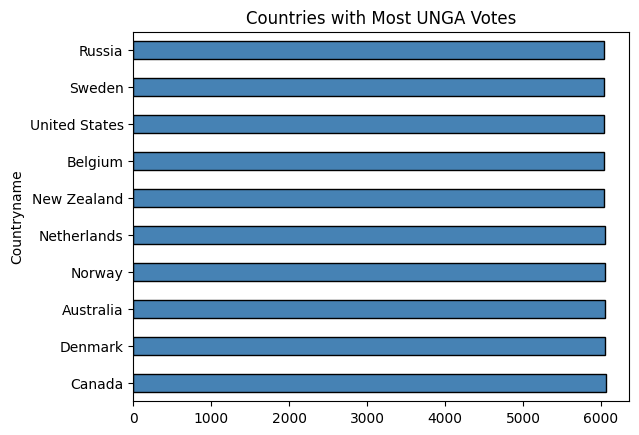

In [ ]:
vote_counts.head(10).plot(kind='barh', title='Countries with Most UNGA Votes', color='steelblue', edgecolor='black')

These are countries with the highest number of recorded votes in the UN General Assembly (UNGA), with Russia, Sweden, and the United States leading the list. Other top participants include long-standing democracies and active multilateral actors such as Belgium, Canada, and Australia. These countries have extensive voting histories due to their early membership in the UN and consistent participation in international diplomacy. Their large sample sizes make them especially valuable for trend analysis, alliance behavior, and modeling shifts in global alignment with the United States over time.

<Axes: title={'center': 'Countries with Fewest UNGA Votes'}, ylabel='Countryname'>

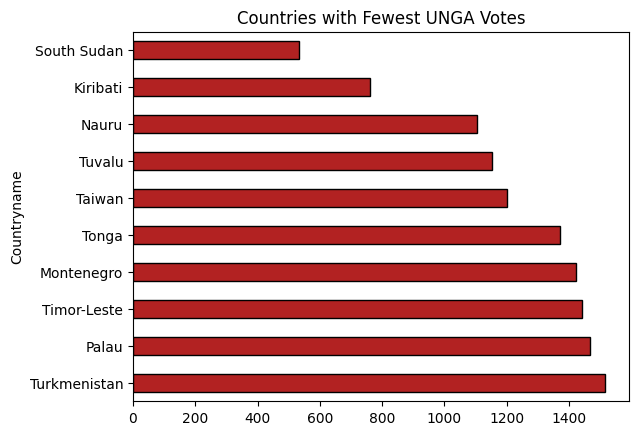

In [ ]:
vote_counts.tail(10).plot(kind='barh', title='Countries with Fewest UNGA Votes', color='firebrick', edgecolor='black')

South Sudan, the newest country on the list, has participated in the fewest votes, followed by small island states like Kiribati, Nauru, and Tuvalu. Others, such as Taiwan, Timor-Leste, and Palau, also have relatively low voting counts, likely due to late admission to the UN, limited diplomatic engagement, or unique political status. These countries’ limited voting histories mean that analyses of their diplomatic behavior, like theirr alignment with the U.S., should be interpreted with caution due to smaller sample sizes.

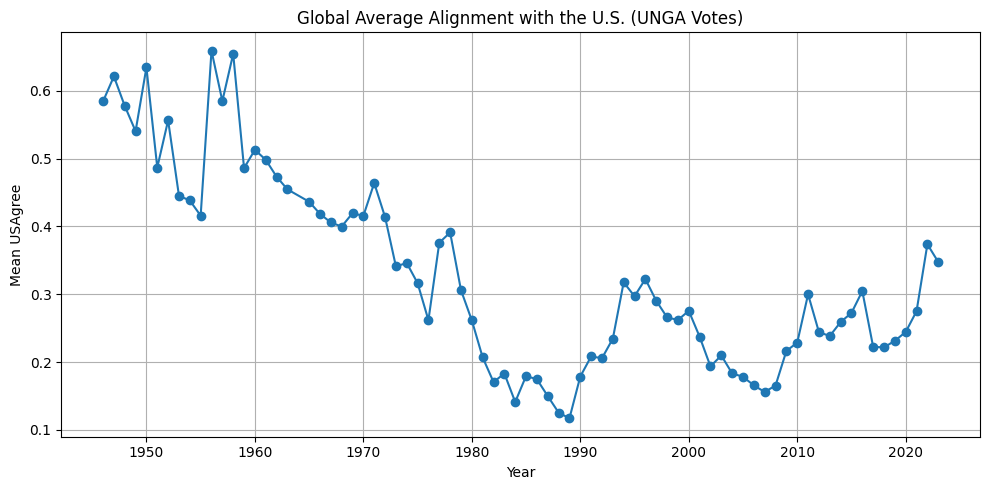

In [ ]:
# average alignment with the U.S. over time
avg_us_align = idealpoints.groupby('session')['USAgree'].mean()
years = avg_us_align.index + 1945

plt.figure(figsize=(10, 5))
plt.plot(years, avg_us_align.values, marker='o')
plt.title('Global Average Alignment with the U.S. (UNGA Votes)')
plt.xlabel('Year')
plt.ylabel('Mean USAgree')
plt.grid(True)
plt.tight_layout()
plt.show()

The data shows a steady decline in global agreement with U.S. positions from the 1950s through the 1980s, reaching a low point around the early 1990s. Although there have been some periods of modest recovery, particularly in the early 2000s and again after 2020, the overall trend reflects a long-term erosion of U.S. influence in multilateral forums. The most recent uptick may suggest a partial restoration of diplomatic support, possibly linked to global reactions to events like the Russia–Ukraine conflict or shifts in U.S. foreign policy.

In [ ]:
# countries in nato as of 2024
nato = [
    'Albania', 'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Montenegro',
    'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Turkey', 'United Kingdom', 'United States'
]

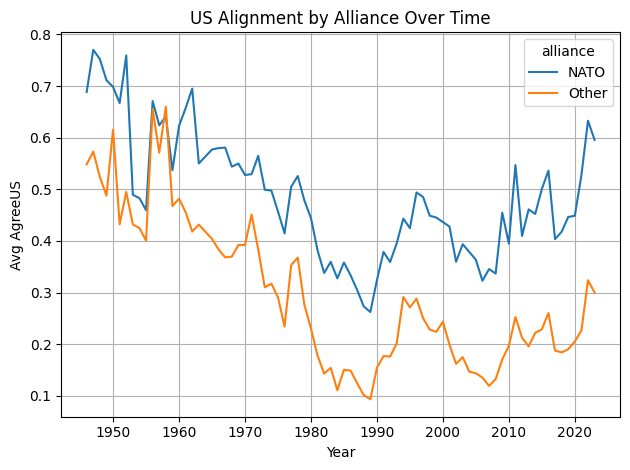

In [ ]:
# grouping countries based on their membership in NATO to spot coalitional drifts
idealpoints['alliance'] = idealpoints['Countryname'].map(lambda x:
    'NATO' if x in nato else
    'Other'
)

# regional trends
regionaltrend = idealpoints.groupby(['alliance', 'session'])['USAgree'].mean().reset_index()
regionaltrend['year'] = regionaltrend['session'] + 1945

# plot
sns.lineplot(data=regionaltrend, x='year', y='USAgree', hue='alliance')
plt.title('US Alignment by Alliance Over Time')
plt.ylabel('Avg AgreeUS')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

NATO countries consistently exhibit higher agreement with the U.S., though their alignment declined from the 1950s through the 1980s before partially recovering in the 2000s and 2020s. Non-NATO countries display a sharper and more sustained decline in alignment, especially after the 1970s, with average scores remaining low through the 21st century. This divergence suggests a long-term erosion of U.S. influence among non-allied states, while NATO allies have remained more stable, albeit not immune to periods of reduced alignment.

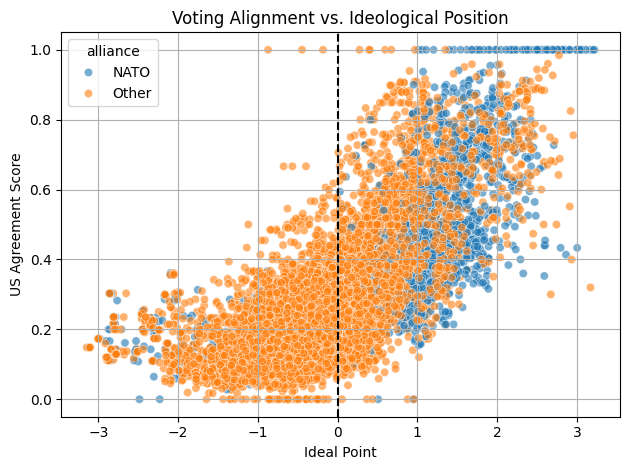

In [ ]:
sns.scatterplot(data=idealpoints, x='IdealPointAll', y='USAgree', hue='alliance', alpha=0.6)
plt.title('Voting Alignment vs. Ideological Position')
plt.xlabel('Ideal Point')
plt.ylabel('US Agreement Score')
plt.axvline(0, linestyle='--', color='black')
plt.grid(True)
plt.tight_layout()
plt.show()

There is a clear positive correlation between countries closer to the U.S. ideologically (right of center) tend to vote more consistently with the U.S. in the UNGA. NATO members are heavily concentrated on the right side of the ideological spectrum and generally have higher alignment scores, reinforcing the idea that alliance membership and ideological proximity are strong predictors of diplomatic alignment. Conversely, countries ideologically distant from the U.S. (left of the dashed line) exhibit much lower alignment scores, particularly among non-NATO members.

In [ ]:
trend = idealpoints.sort_values(['Countryname', 'session'])
firsttrend = trend.groupby('Countryname').first()['USAgree']
lasttrend = trend.groupby('Countryname').last()['USAgree']
decrdiff = (lasttrend - firsttrend).sort_values()

# top 25 countries with declining US alignment
decrdiff.sample(25)

,USAgree
Countryname,
Australia,-0.038760
Samoa,0.259740
Malaysia,-0.426129
Burkina Faso,-0.179257
Bosnia & Herzegovina,-0.458824
Tuvalu,-0.434210
New Zealand,-0.224739
Philippines,-0.441176
Timor-Leste,0.127137


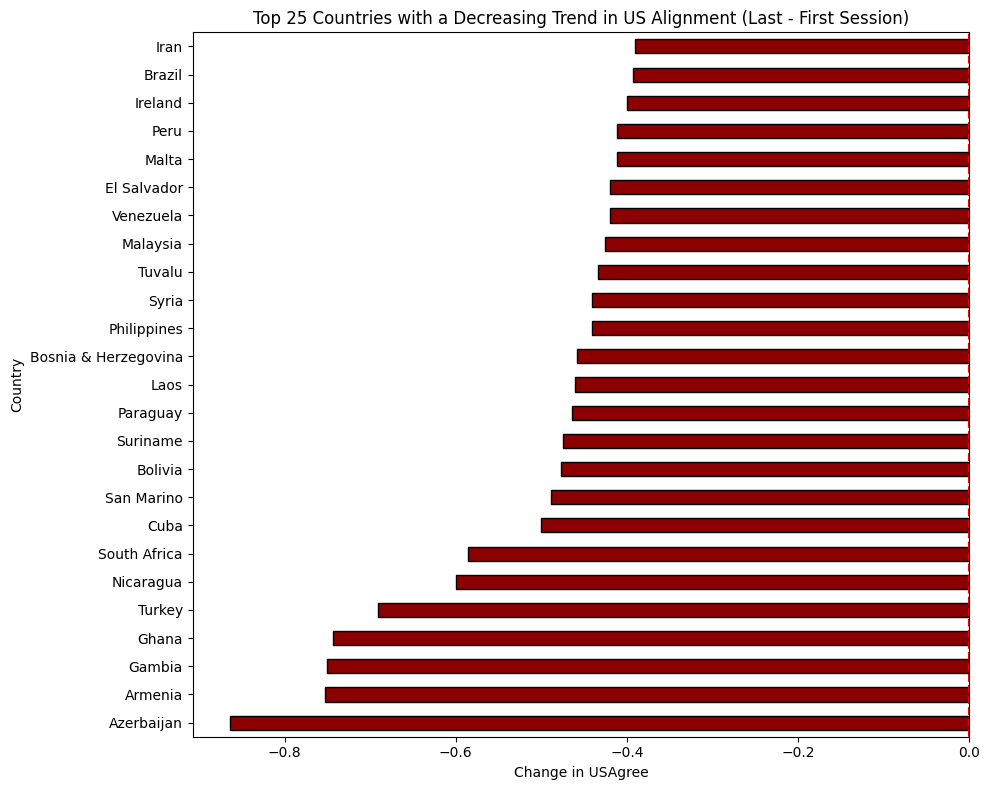

In [ ]:
# top 25 countries with declining US alignment
decr_agree = decrdiff.head(25).sort_values()

plt.figure(figsize=(10, 8))
decr_agree.plot(kind='barh', color='darkred', edgecolor='black')

plt.title('Top 25 Countries with a Decreasing Trend in US Alignment (Last - First Session)')
plt.xlabel('Change in USAgree')
plt.ylabel('Country')
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

Countries like Iran, Brazil, and Ireland show the steepest declines, suggesting a notable shift away from U.S. positions. The list spans regions, including Latin America (Peru, El Salvador), Africa (South Africa, Ghana), Asia (Malaysia, Syria), and Eastern Europe (Armenia, Azerbaijan), indicating that diplomatic distancing is a global phenomenon. This downward trend may reflect broader geopolitical realignments, issue-based divergence, or diminishing U.S. influence in certain regions.

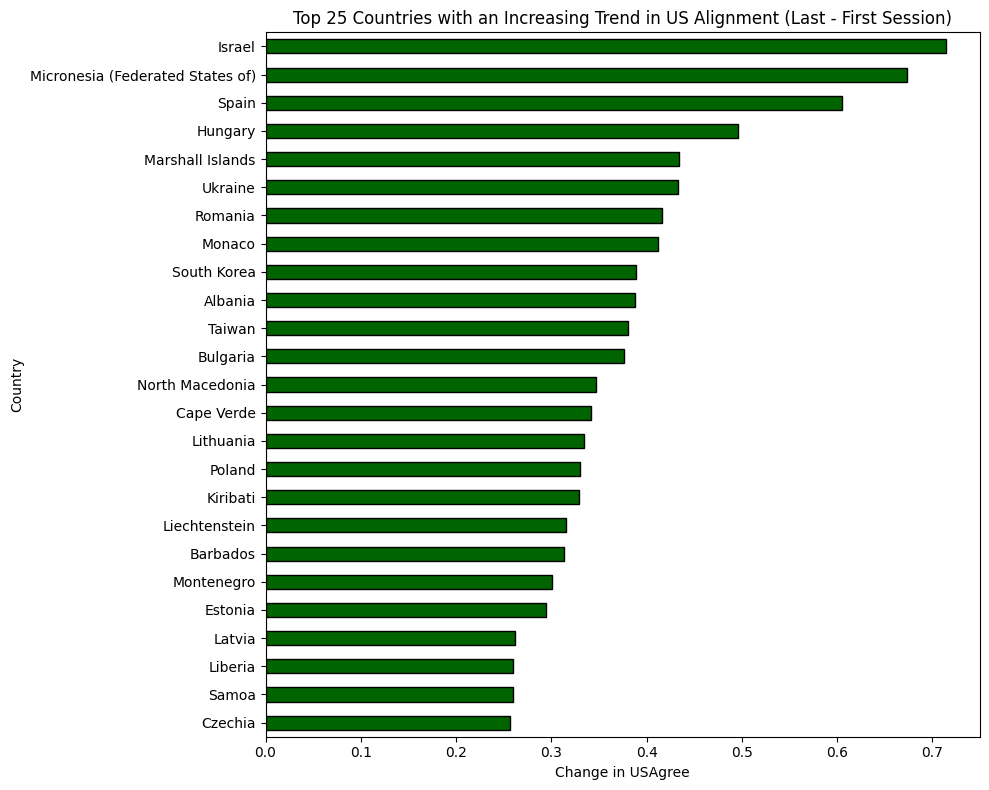

In [ ]:
# top 25 countries with increasing US alignment
decr_agree = decrdiff.tail(25).sort_values()

plt.figure(figsize=(10, 8))
decr_agree.plot(kind='barh', color='darkgreen', edgecolor='black')

plt.title('Top 25 Countries with an Increasing Trend in US Alignment (Last - First Session)')
plt.xlabel('Change in USAgree')
plt.ylabel('Country')
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

Countries like Israel, Micronesia, and Spain top the list, indicating a strong upward trend in support for U.S. positions. The list includes several NATO and Eastern European countries (e.g., Hungary, Romania, Lithuania), as well as Pacific allies and small states like the Marshall Islands and Kiribati. These findings suggest that diplomatic alignment with the U.S. has strengthened in many parts of Europe and the Pacific, reflecting expanding coalitions or shifting geopolitical loyalties.

## Autocorrelation Analysis
* If autocorrelation is high, those countries tend to maintain similar voting behavior over time which is a sign that alliances are being maintained.
* If autocorrelation is low, alignment with those countries is volatile, and countries may shift positions often which is a sign of diplomatic instability or changing alliances.

**Economic Risk**
* High autocorrelation: Diplomatic alliances are stable, making them predictable and less risky.
* Low autocorrelation: Alignment is unpredictable, signaling potential political risk for:
  - Trade agreements
  - Sanction coalitions
  - Multilateral diplomatic strategy

In [ ]:
from statsmodels.tsa.stattools import acf

# defining a function to calculate autocorrelation (lag-1) for each country
def get_acf(series):
    try:
        return acf(series.dropna(), nlags=1)[1]
    except:
        return None

# applying to each country's USAgree time series
autocorr = idealpoints.sort_values(['Countryname', 'session']).groupby('Countryname')['USAgree'].apply(get_acf).reset_index()
autocorr.columns = ['Countryname', 'USAgree_autocorr']

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [ ]:
autocorr.isnull().sum()

,0
Countryname,0
USAgree_autocorr,1


In [ ]:
autocorr = autocorr.dropna()
autocorr

,Countryname,USAgree_autocorr
0,Afghanistan,0.696581
1,Albania,0.844275
2,Algeria,0.717567
3,Andorra,0.517042
4,Angola,0.354821
...,...,...
194,Yemen Arab Republic,0.568567
195,Yemen People's Republic,0.749686
196,Yugoslavia,0.622917
197,Zambia,0.742545


In [ ]:
# sorting by autocorrelation score (descending or ascending)
sortedautocorr = autocorr.sort_values('USAgree_autocorr', ascending=False)

# top and bottom 10
print("Top 10 most agreeable countries (highest autocorrelation):")
display(sortedautocorr.head(10))

print("\nTop 10 most volatile countries (lowest autocorrelation):")
display(sortedautocorr.tail(10))

Top 10 most agreeable countries (highest autocorrelation):


,Countryname,USAgree_autocorr
23,Brazil,0.929225
126,Nicaragua,0.927045
138,Peru,0.908762
137,Paraguay,0.908529
36,Colombia,0.907316
76,Honduras,0.905985
50,Dominican Republic,0.896602
139,Philippines,0.896406
174,Thailand,0.896215
125,New Zealand,0.893778



Top 10 most volatile countries (lowest autocorrelation):


,Countryname,USAgree_autocorr
70,Grenada,0.202545
162,St. Kitts & Nevis,0.198192
10,Azerbaijan,0.171676
177,Tonga,0.113566
171,Taiwan,0.091919
54,Equatorial Guinea,-0.019337
21,Bosnia & Herzegovina,-0.027126
182,Tuvalu,-0.030774
147,San Marino,-0.074533
91,Kiribati,-0.085256


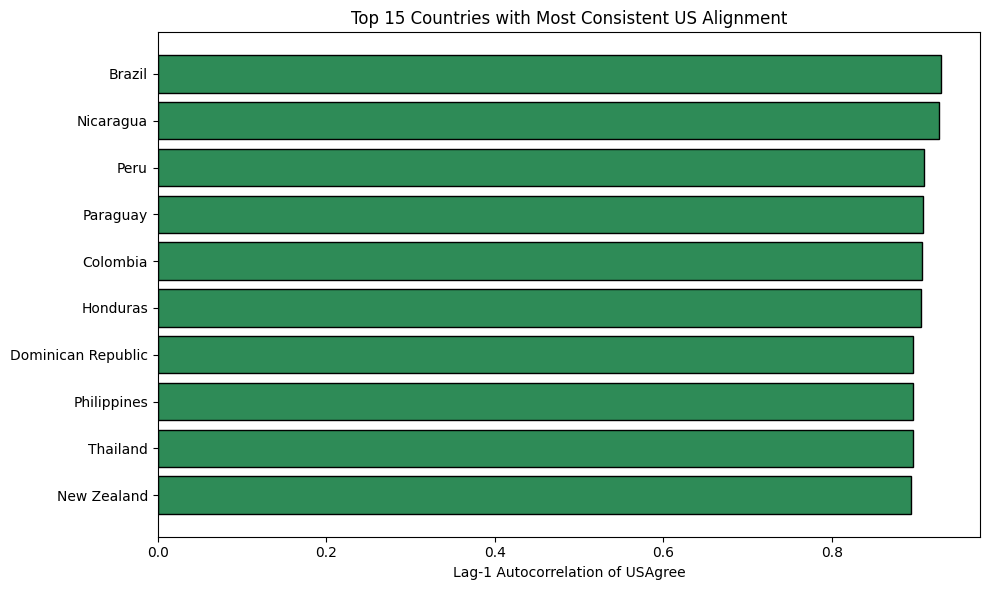

In [ ]:
# top 10 most agreeable countries
top10 = sortedautocorr.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10['Countryname'], top10['USAgree_autocorr'], color='seagreen', edgecolor='black')
plt.xlabel('Lag-1 Autocorrelation of USAgree')
plt.title('Top 15 Countries with Most Consistent US Alignment')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Countries like Brazil, Nicaragua, Peru, and Colombia demonstrate strong stability in their voting behavior, indicating persistent alignment with U.S. positions over time. The list is dominated by Latin American and Southeast Asian nations, along with New Zealand, suggesting reliable regional allies. High autocorrelation signals that these countries are predictable diplomatic partners, making them strong candidates for sustained coalition-building and strategic cooperation.

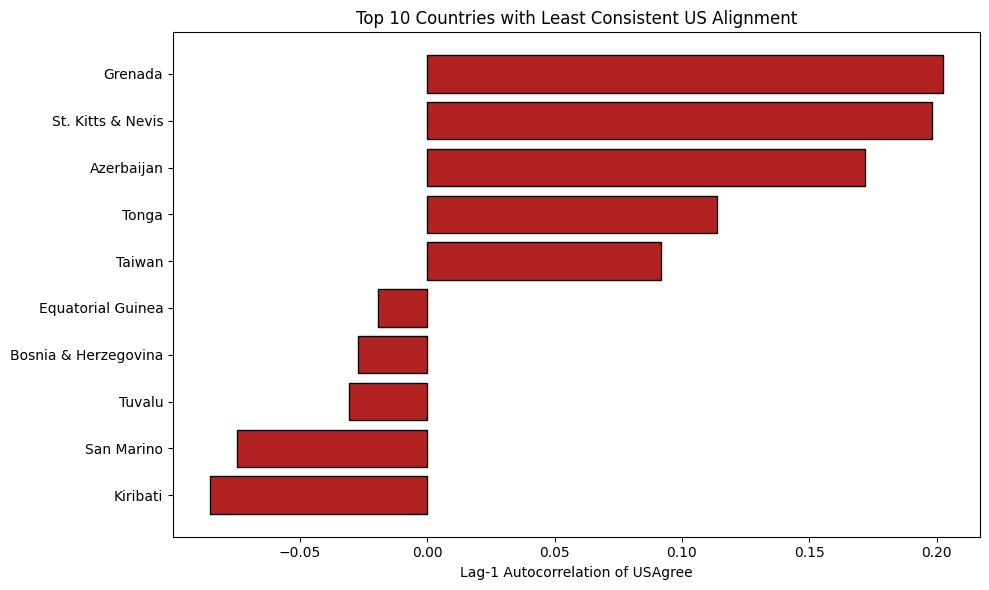

In [ ]:
# bottom 10 - less agreeable countries
bottom10 = sortedautocorr.tail(10)

plt.figure(figsize=(10, 6))
plt.barh(bottom10['Countryname'], bottom10['USAgree_autocorr'], color='firebrick', edgecolor='black')
plt.xlabel('Lag-1 Autocorrelation of USAgree')
plt.title('Top 10 Countries with Least Consistent US Alignment')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Countries like Kiribati, San Marino, and Tuvalu exhibit highly erratic voting patterns, with alignment in one session offering little to no predictive value for the next. Even the most stable countries on this list, like Grenada and St. Kitts & Nevis, display weak consistency. These patterns suggest that these countries may be diplomatically unpredictable, potentially influenced by shifting regional dynamics, aid dependencies, or issue-specific voting behavior which makes them unreliable partners in multilateral coalitions.

## Diplomatic Risk Index
Countries with declining alignment, volatile voting, and ideological distance from the U.S. indicate more diplomatic risk where they are less likely to be partners for multilateral cooperation, trade agreements, or global coalitions.

In [ ]:
# session order
idealpoints_sorted = idealpoints.sort_values(['Countryname', 'session'])

# computing change and volatility per country
dri_components = idealpoints_sorted.groupby('Countryname').agg(
    USAgree_start=('USAgree', 'first'),
    USAgree_end=('USAgree', 'last'),
    USAgree_change=('USAgree', lambda x: x.iloc[-1] - x.iloc[0]),
    USAgree_volatility=('USAgree', 'std'),
    latest_idealpoint=('IdealPointAll', 'last')
).reset_index()

# computing ideological distance from US (ideal point = 0)
dri_components['ideological_distance'] = dri_components['latest_idealpoint'].abs()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# normalizing risk-contributing variables: declining alignment, volatility, ideological distance
dri_components[['norm_decline', 'norm_volatility', 'norm_ideodist']] = scaler.fit_transform(
    dri_components[['USAgree_change', 'USAgree_volatility', 'ideological_distance']]
)

# for decline, reverse sign so more negative = higher risk
dri_components['norm_decline'] = -dri_components['norm_decline']

In [ ]:
# computing DRI and weighing each component equally
dri_components['DiplomaticRiskIndex'] = (
    dri_components['norm_decline'] +
    dri_components['norm_volatility'] +
    dri_components['norm_ideodist']
) / 3

In [ ]:
# flagging countries with high risk
threshold = dri_components['DiplomaticRiskIndex'].quantile(0.75)
dri_components['HighRiskFlag'] = dri_components['DiplomaticRiskIndex'] > threshold

# sorting by risk and preview
drirank = dri_components.sort_values('DiplomaticRiskIndex', ascending=False)
risk10 = drirank[['Countryname', 'DiplomaticRiskIndex', 'USAgree_change', 'USAgree_volatility', 'ideological_distance']].head(10)
risk10

,Countryname,DiplomaticRiskIndex,USAgree_change,USAgree_volatility,ideological_distance
126,Nicaragua,0.508187,-0.599409,0.284967,1.733465
191,Venezuela,0.403458,-0.420090,0.224640,1.761132
81,Iran,0.353722,-0.390244,0.189436,1.744268
42,Cuba,0.346068,-0.500581,0.220017,1.245315
169,Syria,0.331209,-0.441176,0.112893,2.165025
157,South Africa,0.323358,-0.585994,0.265317,0.544375
20,Bolivia,0.303703,-0.477143,0.224048,0.930259
66,German Federal Republic,0.274178,-0.196032,0.139259,1.894994
186,United Kingdom,0.271297,-0.068067,0.141371,2.057023
10,Azerbaijan,0.263279,-0.864407,0.155849,0.613044


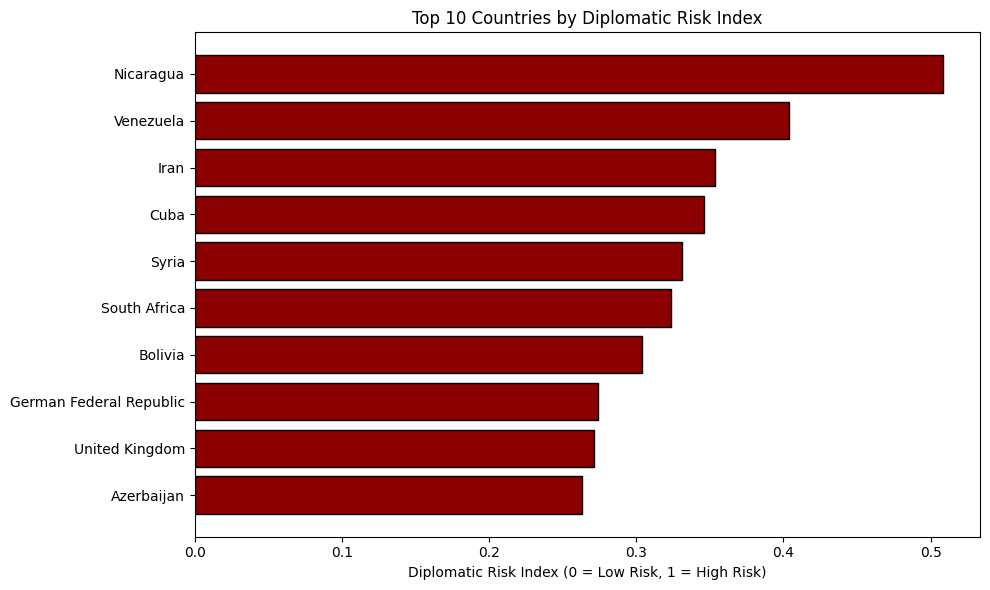

In [ ]:
top_risk = drirank.head(10).sort_values('DiplomaticRiskIndex')

plt.figure(figsize=(10, 6))
plt.barh(top_risk['Countryname'], top_risk['DiplomaticRiskIndex'], color='darkred', edgecolor='black')
plt.title('Top 10 Countries by Diplomatic Risk Index')
plt.xlabel('Diplomatic Risk Index (0 = Low Risk, 1 = High Risk)')
plt.tight_layout()
plt.show()

Countries like Nicaragua, Venezuela, Iran, and Cuba lead the Diplomatic Risk Index, reflecting persistent opposition to U.S. positions. Notably, South Africa and Bolivia also rank high, suggesting recent volatility or drift in alignment. The inclusion of traditional allies like the United Kingdom and Germany signals issue-specific divergence, possibly on topics like human rights or Middle East policy. These findings suggest that both adversarial and historically allied nations may pose diplomatic risks, warranting closer monitoring and proactive engagement.

## Building a Predictive Model
By building a predictive model, this will help forecast each country’s future alignment with the U.S. (`USAgree`) using existing features from my Diplomatic Risk Index (DRI) components.

I chose to build an xgboost model to predict diplomatic alignment because I wanted to predict a continuous outcome and xgboost works well for that by keeping the full detail of alignment levels unlike classification models. It also allows me to explain what drives alignment shifts the most based on feature importance.

In [ ]:
# ensuring sorted by session for each country
idealpoints_sorted = idealpoints.sort_values(['Countryname', 'session'])

def compute_features(group):
    group = group.copy()
    group['USAgree_change'] = group['USAgree'].diff()
    group['USAgree_volatility'] = group['USAgree'].rolling(window=3, min_periods=2).std()
    group['Ideological_distance'] = group['IdealPointAll'].abs()
    group['USAgree_next'] = group['USAgree'].shift(-1)  # target variable
    return group

# applying to each country
predict_df = (
    idealpoints_sorted
    .groupby('Countryname', group_keys=False)
    .apply(compute_features)
    .reset_index(drop=True)
)

# dropping rows with missing values in features or target
predict_df = predict_df.dropna(subset=[
    'USAgree', 'USAgree_change', 'USAgree_volatility',
    'Ideological_distance', 'USAgree_next'
])

<ipython-input-39-bbab12ebccf2>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_features)


In [ ]:
# features and target
features = ['USAgree', 'USAgree_change', 'USAgree_volatility', 'Ideological_distance']
target = 'USAgree_next'

X = predict_df[features]
y = predict_df[target]

In [ ]:
from sklearn.model_selection import train_test_split

# splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# initialize and train model
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb.fit(X_train, y_train)

# predict
y_pred = xgb.predict(X_test)

# evaluate
print(f"XGBoost R² Score: {r2_score(y_test, y_pred):.3f}")
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Calculate RMSE manually
print(f"XGBoost RMSE: {rmse:.3f}")

XGBoost R² Score: 0.831
XGBoost RMSE: 0.081


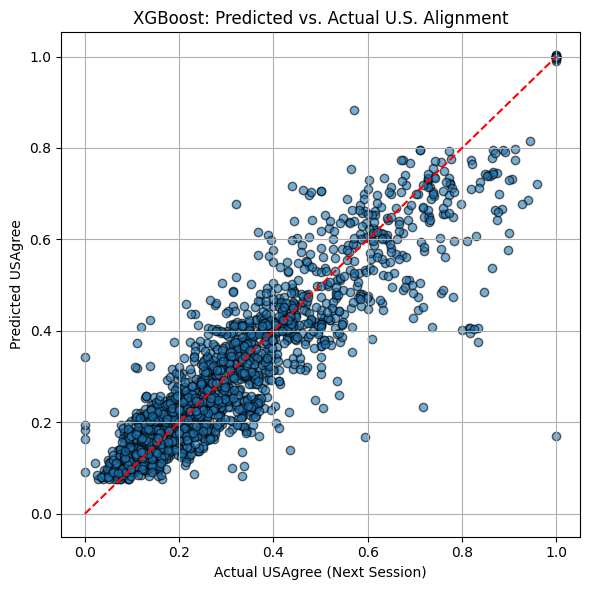

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('Actual USAgree (Next Session)')
plt.ylabel('Predicted USAgree')
plt.title('XGBoost: Predicted vs. Actual U.S. Alignment')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the scatterplot, there is a strong positive correlation between high past alignment and features and high future alignment. There is a sslight bias in the high-alignment predictions, but it doesn't seem to be a major error.

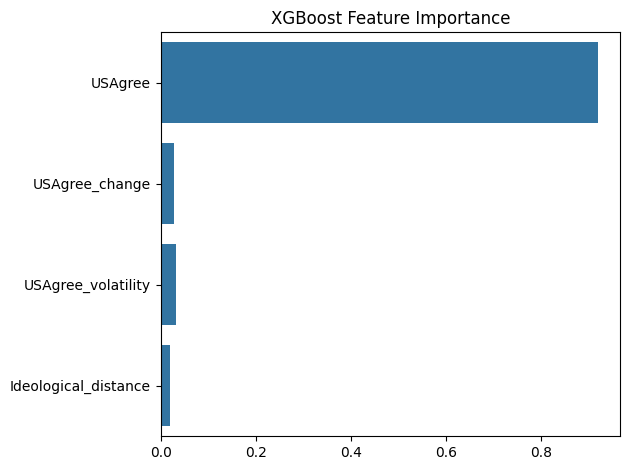

In [ ]:
# feature importance
importance = xgb.feature_importances_
sns.barplot(x=importance, y=features)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

The feature importance shows us that the diplomatic alignment is highly consistent ove rtime, and once a country is aligned with the U.S. or not aligned with the U.S., that status tends to continue.